In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv',index_col=0,parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
df=df[(df['value']>=df['value'].quantile(0.025)) 
          & (df['value']<=df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Text(0, 0.5, 'Page Views')

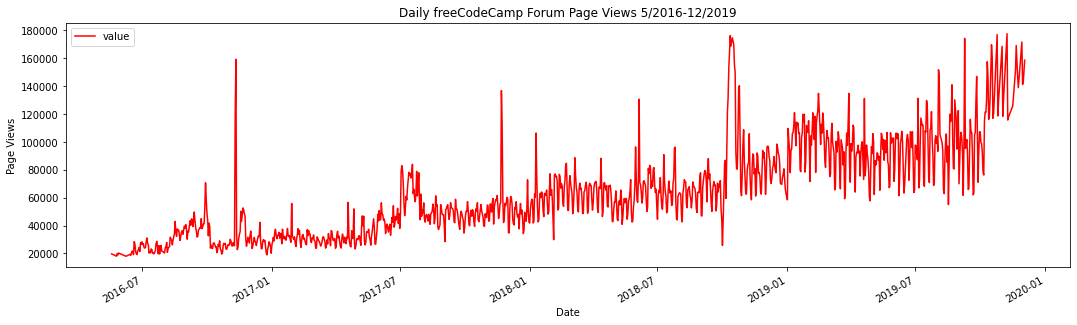

In [4]:
fig=df.plot(y='value',figsize=(18,5),color='red').figure
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')

In [5]:
fig.savefig('Line Chart.png')

In [6]:
df_copy=df.copy()
df_copy['Years']=df.index.year
df_copy['Month']=df.index.strftime('%B')
df_copy

,value,Years,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [7]:
data=df_copy.groupby(['Years','Month']).mean().round(0).rename(columns={'value':'Average Page Views'}).reset_index()
data

,Years,Month,Average Page Views
0,2016,August,31049.0
1,2016,December,27832.0
2,2016,July,24110.0
3,2016,June,21875.0
4,2016,May,19432.0
5,2016,November,40449.0
6,2016,October,27398.0
7,2016,September,41477.0
8,2017,April,30879.0
9,2017,August,47712.0


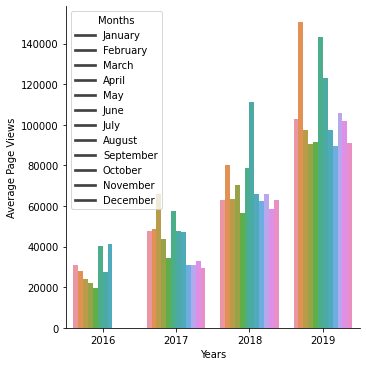

In [8]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
plotfig=sbn.catplot(x='Years',y='Average Page Views',hue='Month',data=data,kind='bar',legend=False).fig
plt.legend(months,loc='upper left',title='Months')

In [9]:
plotfig.savefig('Bar Chart.png')

In [10]:
df_copy=df.copy()
df_copy['Year']=df.index.year
df_copy['Month']=df.index.strftime('%b')
df_copy

,value,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,Nov
2019-11-29,171584,2019,Nov
2019-11-30,141161,2019,Nov


Text(0, 0.5, 'Page Views')

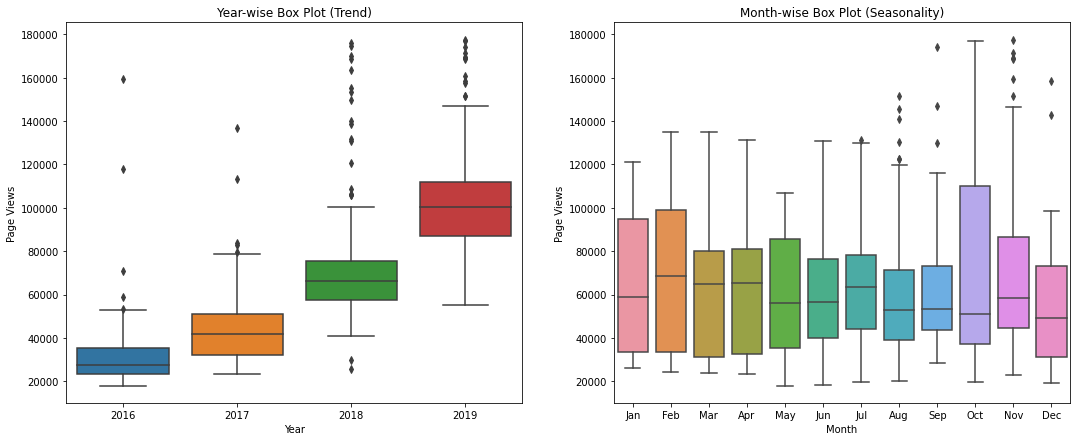

In [11]:
fig,axes=plt.subplots(ncols=2,figsize=(18,7))
sbn.boxplot(x='Year',y='value',data=df_copy,ax=axes[0])
sbn.boxplot(x='Month',y='value',data=df_copy,ax=axes[1]
            ,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.axes[0].set_title('Year-wise Box Plot (Trend)')
fig.axes[1].set_title('Month-wise Box Plot (Seasonality)')
fig.axes[0].set_ylabel('Page Views')
fig.axes[1].set_ylabel('Page Views')

In [12]:
fig.savefig('boxplot.png')

https://replit.com/@ShefaliDhingra/boilerplate-page-view-time-series-visualizer-4#time_series_visualizer.py